In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# 1. DATASET PREPRATION AND PREPROCESSING

# Data Collection

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [87]:
# cancer

In [86]:
type(cancer)

sklearn.utils.Bunch

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
#label_names = cancer['target_names']

In [8]:
#label = cancer['target']

In [9]:
#feature_names = cancer['feature_names']

In [10]:
#feature = cancer['data']

In [ ]:
#X = pd.DataFrame(cancer.data)

In [ ]:
#y = pd.DataFrame(cancer.target)

In [11]:
columns_names = np.append(cancer.feature_names, ["target"])

In [12]:
data = np.c_[cancer.data, cancer.target]    

In [13]:
wdbc = pd.DataFrame(data, columns=columns_names)

In [14]:
wdbc.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [15]:
dic = {0:'B', 1:'M'}

In [16]:
wdbc['target'] = wdbc['target'].map(dic)

In [17]:
wdbc.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,B
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,B
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,B
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,B
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,M


In [1]:
# X = wdbc.drop('target', axis=1)

In [2]:
# y = wdbc['target']

In [18]:
wdbc.shape

(569, 31)

In [19]:
wdbc.index

RangeIndex(start=0, stop=569, step=1)

In [20]:
wdbc.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [21]:
wdbc.count()

mean radius                569
mean texture               569
mean perimeter             569
mean area                  569
mean smoothness            569
mean compactness           569
mean concavity             569
mean concave points        569
mean symmetry              569
mean fractal dimension     569
radius error               569
texture error              569
perimeter error            569
area error                 569
smoothness error           569
compactness error          569
concavity error            569
concave points error       569
symmetry error             569
fractal dimension error    569
worst radius               569
worst texture              569
worst perimeter            569
worst area                 569
worst smoothness           569
worst compactness          569
worst concavity            569
worst concave points       569
worst symmetry             569
worst fractal dimension    569
target                     569
dtype: int64

In [22]:
wdbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

* Descriptive Statistics

In [23]:
wdbc.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Visualisation

In [24]:
sns.set(style="darkgrid")

* Correlation between Dataset Features

In [25]:
features_mean = wdbc.columns[1:11]

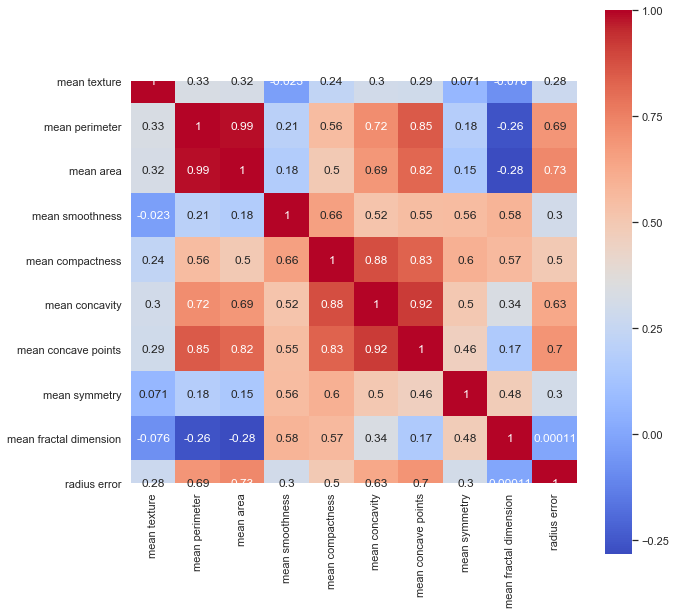

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(wdbc[wdbc.columns[1:11]].corr(), annot=True, square=True, cmap='coolwarm')

* DATASET Feature visualisation
  * Frequency Distrubution - Count Plot (Qualitative Variable), 
     * Histogram (DISTplot - hist + KDE) Plot (Quntitative Variable)
  * Joint Distribution of two variable - Scatter Plot (Quntitative Variable)

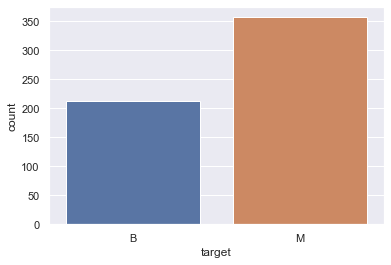

In [27]:
sns.countplot(wdbc['target'])

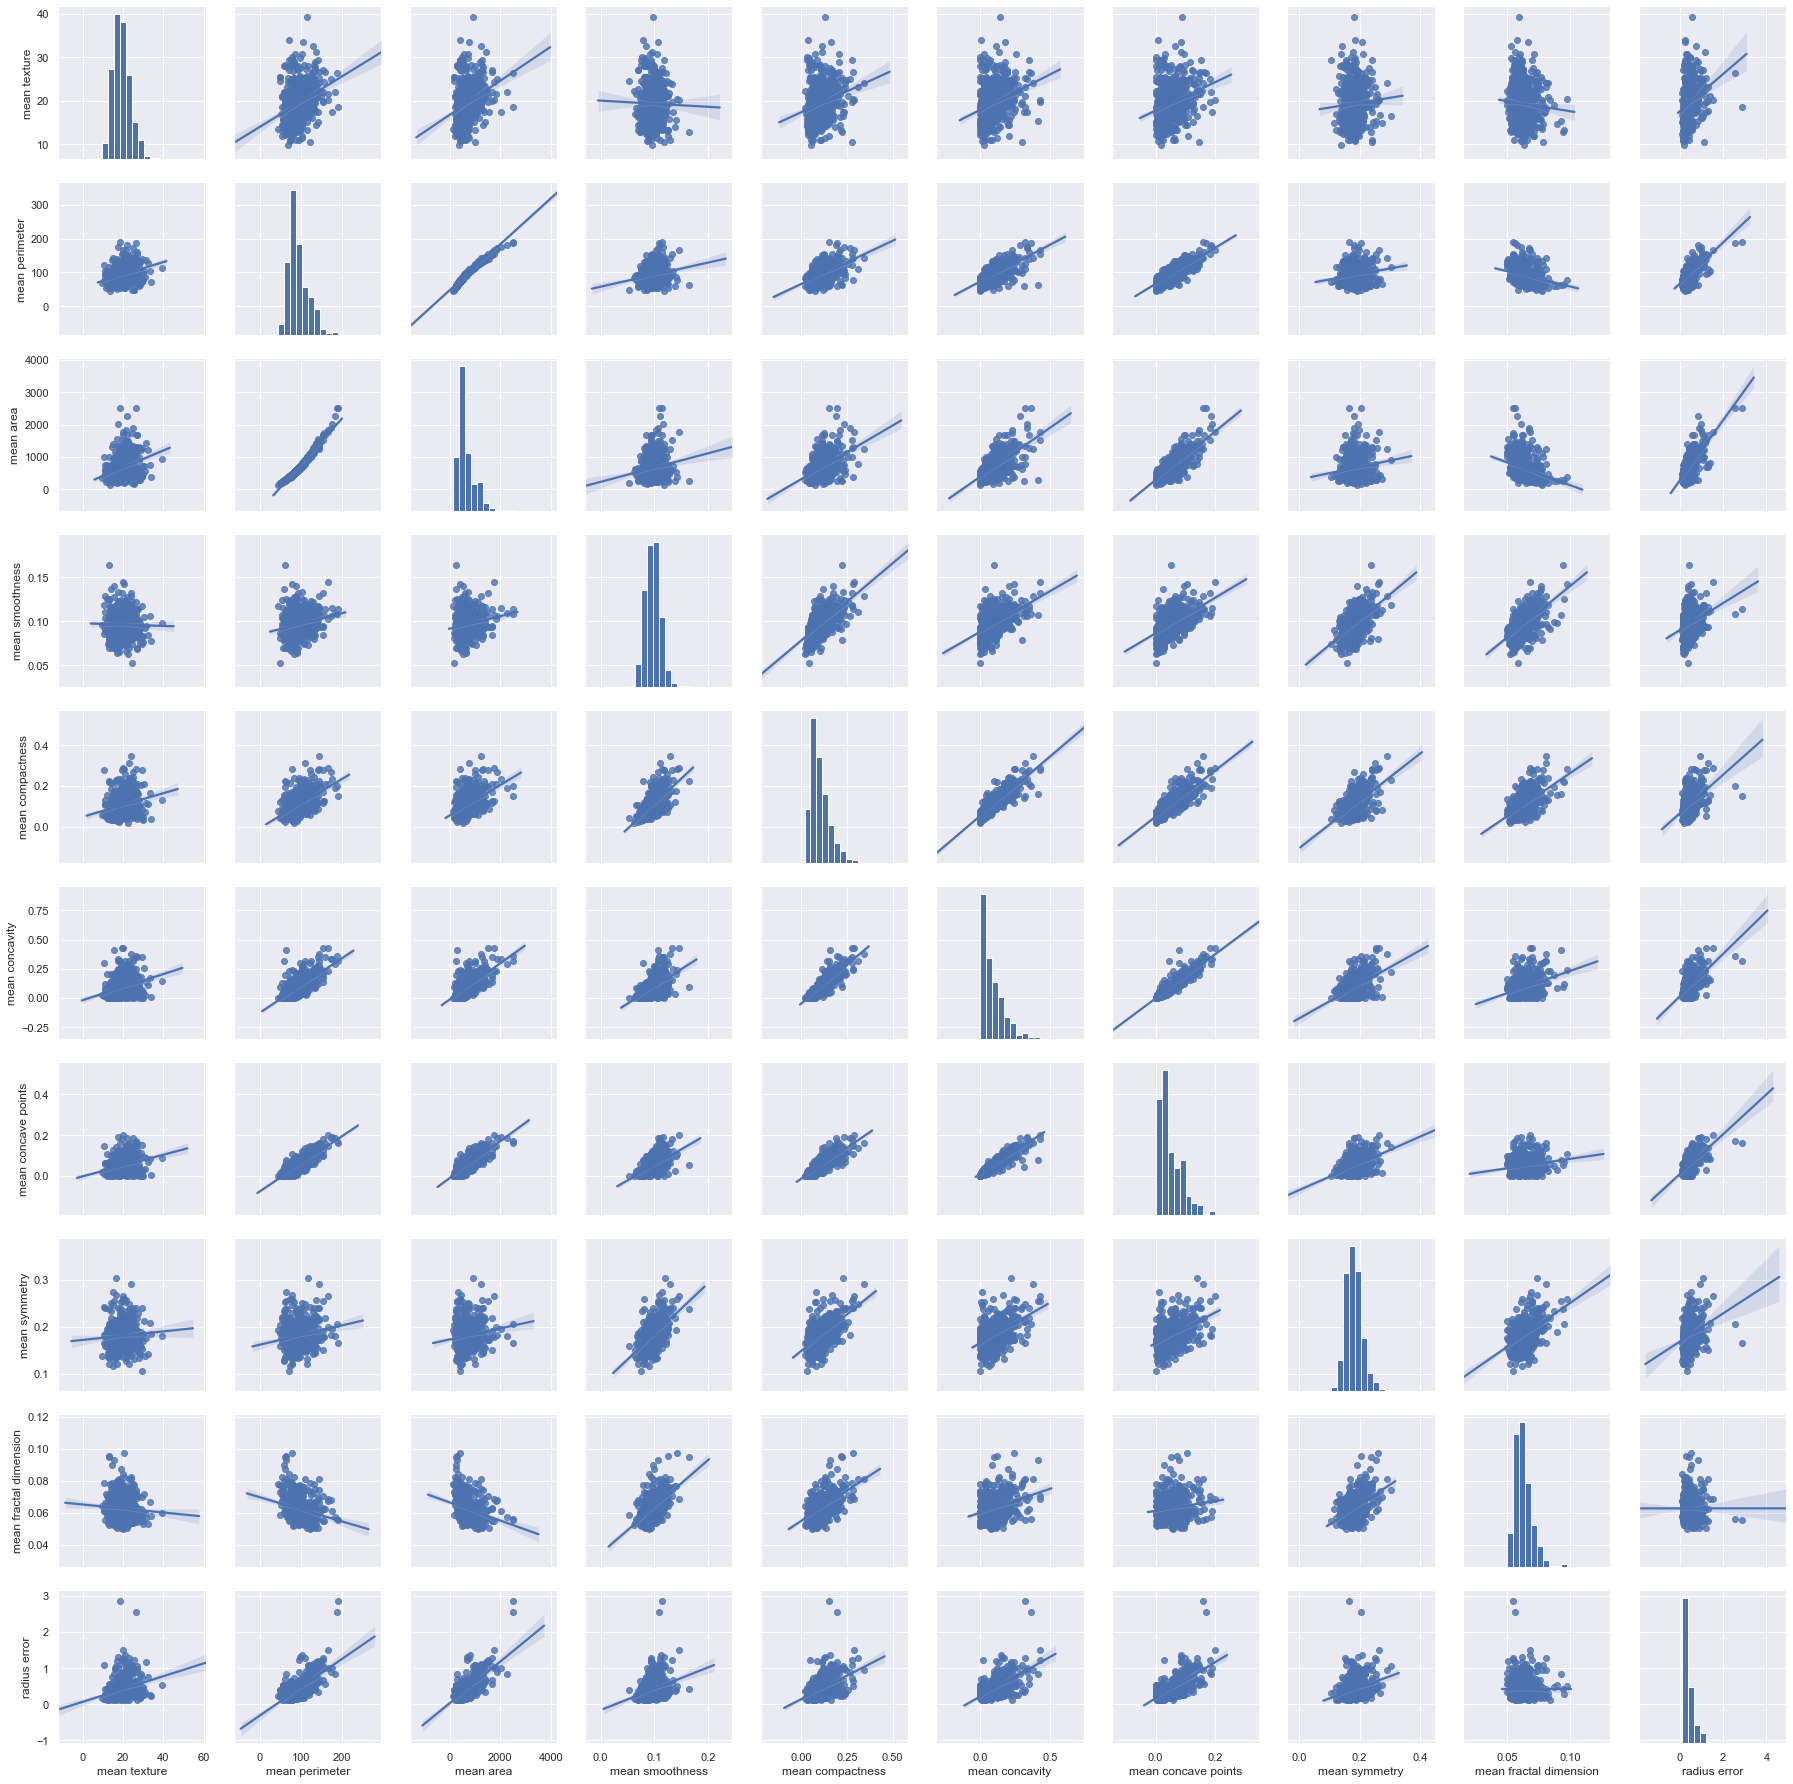

In [28]:
sns.pairplot(wdbc[features_mean], kind='reg')

In [29]:
#sns.pairplot(wdbc[features_mean], hue='target', kind='reg')

* DATASET Feature visualisation
  * Descriptive Statistics - Box plot

In [30]:
#wdbc_drop = wdbc.drop('target',axis=1)
#for i,j in enumerate(wdbc_drop):
    #plt.figure(i)
    #plt.figure(figsize=(4,4))
    #sns.boxplot(x='target', y= j, data= wdbc, palette = 'Set1') 

In [31]:
#wdbc_drop = wdbc.drop('target',axis=1)
#for i,j in enumerate(wdbc_drop):
    #plt.figure(i)
    #plt.figure(figsize=(4,4))
    #sns.barplot(x='target', y= j, data= wdbc, palette = 'Set1') 

# Labeling

# Data Selection

# Preprocessing

In [32]:
from numpy import array
from numpy import argmax

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

* Encoding of Categorial Variables
  * Integer Encoding
  * One Hot Encoding

# Data Transformation

In [33]:
from sklearn.decomposition import PCA

Text(0.5, 1.0, 'PCA Scatter Plot')

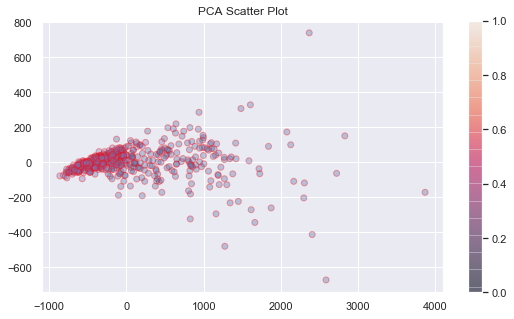

In [34]:
X = wdbc.drop('target',axis=1)
#X = wdbc_drop.values
pca = PCA(n_components=2) #Binary Classifier
X_pca = pca.fit_transform(X)

plt.figure(figsize = (9,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c = wdbc['target'], cmap = "RdBu_r", edgecolor = "Red", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')

# 2. DATASET SPLITING

In [35]:
from sklearn import model_selection

In [36]:
X = wdbc.drop('target', axis=1)
y = wdbc['target']
val_size = 0.2
seed = 7
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size = val_size, random_state = seed)

In [37]:
#Xtrain.tail()

In [38]:
#Xtrain.info()

In [39]:
#Xval.tail()

In [40]:
#Xval.info()

In [41]:
#ytrain.tail()

In [42]:
#yval.tail()

# 3. MODELING

* Model training
* Model evaluation and testing
  * Training and testing on the same data
  * Train/test split Dataset
    * Train/test split
    * Cross-validation
    * Leave One Out (LOO) Cross Validation
    * Repeated Random Test-Train Splits
  * PCA components
    * Pipelining
* Improving predictions with ensemble methods

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Training and testing on the same data

In [44]:
# make predictions
LR = LogisticRegression()
LR.fit(X, y)
predictions = LR.predict(X)
print("Accuracy:", accuracy_score(y, predictions))
#print(confusion_matrix(y, predictions))
#print(classification_report(y, predictions))

Accuracy: 0.9595782073813708


In [45]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
for name, model in models:
    fitting  = model.fit(X, y)
    predictions = model.predict(X)
    cv_results = accuracy_score(y, predictions)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results)
    print(msg)

LR: 0.959578 
KNN: 0.947276 
CART: 1.000000 
NB: 0.942004 
SVM: 1.000000 


In [46]:
results

[0.9595782073813708, 0.9472759226713533, 1.0, 0.9420035149384886, 1.0]

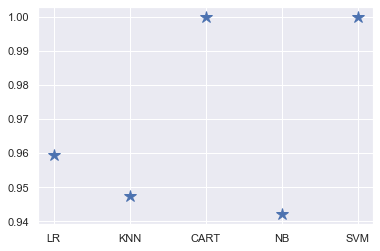

In [47]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [48]:
mx = max(results)
ix = results.index(max(results))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, CART: 1.000000


# Train/test split Dataset

* Train/Test split

In [49]:
# make predictions
LR = LogisticRegression()
LR.fit(Xtrain, ytrain)
predictions = LR.predict(Xtest)
print("Accuracy:", accuracy_score(ytest, predictions))
#print(confusion_matrix(ytest, predictions))
#print(classification_report(ytest, predictions))

Accuracy: 0.9473684210526315


In [50]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
for name, model in models:
    #kfold = model_selection.KFold(n_splits = 5, random_state = seed)
    fitting  = model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)
    cv_results = accuracy_score(ytest, predictions)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results)
    print(msg)

LR: 0.947368 
KNN: 0.929825 
CART: 0.912281 
NB: 0.956140 
SVM: 0.649123 


In [51]:
results

[0.9473684210526315,
 0.9298245614035088,
 0.9122807017543859,
 0.956140350877193,
 0.6491228070175439]

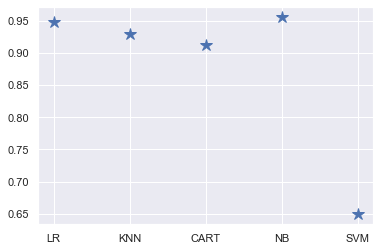

In [52]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [53]:
mx = max(results)
ix = results.index(max(results))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, NB: 0.956140


* K-fold Cross-validation

In [54]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
results_mean = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 5, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = 'accuracy')  
    
    results.append(cv_results)
    names.append(name)
    results_mean.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.952554 (0.022592)
KNN: 0.926207 (0.036174)
CART: 0.894457 (0.037613)
NB: 0.936764 (0.034336)
SVM: 0.627667 (0.132784)


In [55]:
results_mean

[0.952553951249806,
 0.9262071106970966,
 0.8944573823940383,
 0.9367644775655954,
 0.6276665114112715]

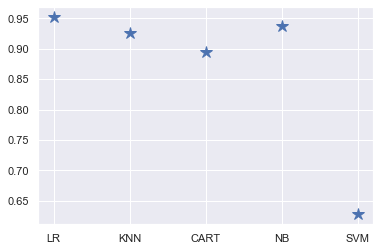

In [56]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results_mean, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [57]:
mx = max(results_mean)
ix = results_mean.index(max(results_mean))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, LR: 0.952554


In [58]:
results

[array([0.9122807 , 0.94736842, 0.97368421, 0.97368421, 0.95575221]),
 array([0.85964912, 0.92105263, 0.96491228, 0.94736842, 0.9380531 ]),
 array([0.85964912, 0.92105263, 0.93859649, 0.9122807 , 0.84070796]),
 array([0.87719298, 0.92105263, 0.95614035, 0.97368421, 0.95575221]),
 array([0.40350877, 0.57017544, 0.64912281, 0.74561404, 0.7699115 ])]

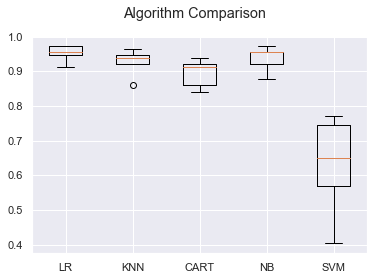

In [59]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* Leave One Out (LOO) Cross Validation

In [60]:
from sklearn.model_selection import LeaveOneOut

In [61]:
LR = LogisticRegression()
#num_folds = 10
loocv = model_selection.LeaveOneOut()
results = model_selection.cross_val_score(LR, X, y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 95.079% (21.630%)


In [62]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
results_mean = []
for name, model in models:
    loocv = model_selection.LeaveOneOut()
    cv_results = model_selection.cross_val_score(model, X, y, cv = loocv, scoring = 'accuracy')  
    
    results.append(cv_results)
    names.append(name)
    results_mean.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.950791 (0.216304)
KNN: 0.933216 (0.249647)
CART: 0.924429 (0.264311)
NB: 0.938489 (0.240266)
SVM: 0.627417 (0.483493)


In [63]:
results_mean

[0.9507908611599297,
 0.9332161687170475,
 0.9244288224956063,
 0.9384885764499121,
 0.6274165202108963]

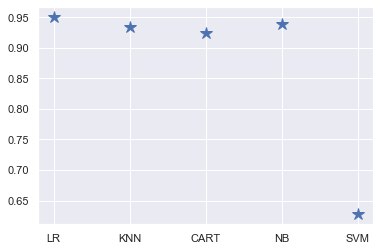

In [64]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results_mean, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [65]:
mx = max(results_mean)
ix = results_mean.index(max(results_mean))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, LR: 0.950791


* Repeated Random Test-Train Splits

In [66]:
model = LogisticRegression()
#num_samples = 10
#num_instances = len(X)
test_size = 0.33
seed = 7
kfold = model_selection.ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 94.574% (1.482%)


In [67]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
results_mean = []
for name, model in models:
    test_size = 0.33
    seed = 7
    kfold = model_selection.ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = 'accuracy')  
    
    results.append(cv_results)
    names.append(name)
    results_mean.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.945745 (0.014817)
KNN: 0.927660 (0.013287)
CART: 0.925000 (0.020525)
NB: 0.937234 (0.021250)
SVM: 0.625000 (0.031311)


In [68]:
results_mean

[0.9457446808510639, 0.9276595744680851, 0.925, 0.9372340425531915, 0.625]

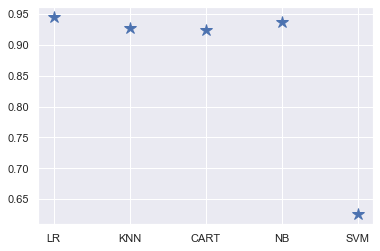

In [69]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results_mean, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [70]:
mx = max(results_mean)
ix = results_mean.index(max(results_mean))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, LR: 0.945745


In [71]:
results

[array([0.95212766, 0.94680851, 0.96276596, 0.95744681, 0.94148936,
        0.96276596, 0.95212766, 0.91489362, 0.92553191, 0.94148936]),
 array([0.93617021, 0.93617021, 0.93085106, 0.93085106, 0.94680851,
        0.94148936, 0.90957447, 0.91489362, 0.92553191, 0.90425532]),
 array([0.93085106, 0.90425532, 0.94680851, 0.92021277, 0.94148936,
        0.92021277, 0.95744681, 0.93085106, 0.91489362, 0.88297872]),
 array([0.95744681, 0.89893617, 0.97340426, 0.93085106, 0.94148936,
        0.94680851, 0.92553191, 0.91489362, 0.95744681, 0.92553191]),
 array([0.68617021, 0.64361702, 0.61702128, 0.63829787, 0.59042553,
        0.63297872, 0.58510638, 0.60106383, 0.65957447, 0.59574468])]

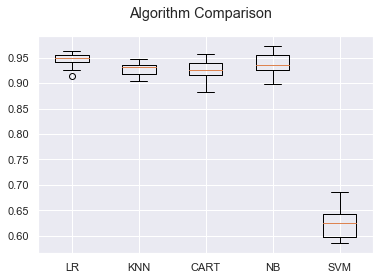

In [72]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# PCA

In [73]:
# make predictions
LR = LogisticRegression()
LR.fit(X_pca, y)
newdata_transformed = pca.transform(X)

predictions = LR.predict(newdata_transformed)
print("Accuracy:", accuracy_score(y, predictions))
#print(confusion_matrix(y, predictions))
#print(classification_report(y, predictions))

Accuracy: 0.9314586994727593


In [74]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
for name, model in models:
    model.fit(X_pca, y)
    newdata_transformed = pca.transform(X)
    predictions = model.predict(newdata_transformed)
    cv_results = accuracy_score(y, predictions)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results)
    print(msg)

LR: 0.931459 
KNN: 0.938489 
CART: 1.000000 
NB: 0.901582 
SVM: 1.000000 


In [75]:
results

[0.9314586994727593, 0.9384885764499121, 1.0, 0.9015817223198594, 1.0]

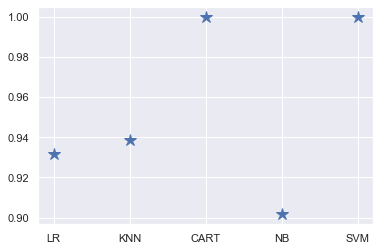

In [76]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [77]:
mx = max(results)
ix = results.index(max(results))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, CART: 1.000000


# Pipelining

In [78]:
from sklearn.pipeline import Pipeline

In [79]:
pipe = Pipeline( [ ('pca', PCA()), ('LR', LogisticRegression()) ] )
pipe.fit(X, y)
pipe.predict(X)
cross_val_score(pipe, X, y).mean()

0.950784368328228

In [80]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
results_mean = []
for name, model in models:
    pipe = Pipeline( [ ('pca', PCA()), (name, model) ] )
    pipe.fit(X, y)
    pipe.predict(X)
    cv_results = cross_val_score(pipe, X, y)
    
    results.append(cv_results)
    names.append(name)
    results_mean.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.950784 (0.008983)
KNN: 0.922668 (0.019391)
CART: 0.892815 (0.021103)
NB: 0.898079 (0.022000)
SVM: 0.627420 (0.001562)


In [81]:
results_mean

[0.950784368328228,
 0.9226677805625174,
 0.8928153717627402,
 0.898078529657477,
 0.6274204028589994]

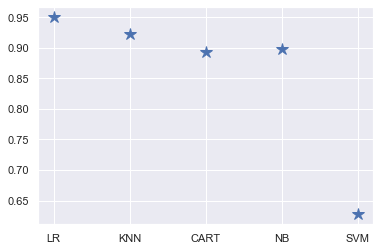

In [82]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results_mean, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [83]:
mx = max(results_mean)
ix = results_mean.index(max(results_mean))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, LR: 0.950784


In [84]:
results

[array([0.94210526, 0.96315789, 0.94708995]),
 array([0.9       , 0.94736842, 0.92063492]),
 array([0.86315789, 0.91052632, 0.9047619 ]),
 array([0.86842105, 0.92105263, 0.9047619 ]),
 array([0.62631579, 0.62631579, 0.62962963])]

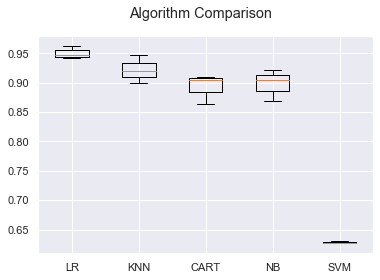

In [85]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()